# Stock Price Prediction Supervised Learning


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Importing libraries

In [0]:
import pandas as pd
import numpy as np

import math,datetime
import time

import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import model_selection
from sklearn.model_selection import train_test_split

style.use ('ggplot')

### Loading Dataset

In [0]:
df = pd.read_csv('GOOG.csv',index_col='Date',parse_dates=True)

In [0]:
print(df.head())

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2004-08-19  49.813286  51.835709  47.800831  49.982655  49.982655  44871300
2004-08-20  50.316402  54.336334  50.062355  53.952770  53.952770  22942800
2004-08-23  55.168217  56.528118  54.321388  54.495735  54.495735  18342800
2004-08-24  55.412300  55.591629  51.591621  52.239193  52.239193  15319700
2004-08-25  52.284027  53.798351  51.746044  52.802086  52.802086   9232100


In [0]:
df.drop(['Adj Close'], axis=1)

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,9232100
...,...,...,...,...,...
2020-04-22,1245.540039,1285.613037,1242.000000,1263.209961,2093100
2020-04-23,1271.550049,1293.310059,1265.670044,1276.310059,1566200
2020-04-24,1261.170044,1280.400024,1249.449951,1279.310059,1640400


Open            AxesSubplot(0.125,0.125;0.110714x0.755)
High         AxesSubplot(0.257857,0.125;0.110714x0.755)
Low          AxesSubplot(0.390714,0.125;0.110714x0.755)
Close        AxesSubplot(0.523571,0.125;0.110714x0.755)
Adj Close    AxesSubplot(0.656429,0.125;0.110714x0.755)
Volume       AxesSubplot(0.789286,0.125;0.110714x0.755)
dtype: object

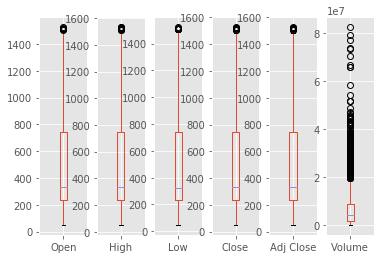

In [0]:
df.plot(kind = 'box', subplots = True, layout = (1,6), sharex = False, sharey = False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0AD70F288>,
      dtype=object)

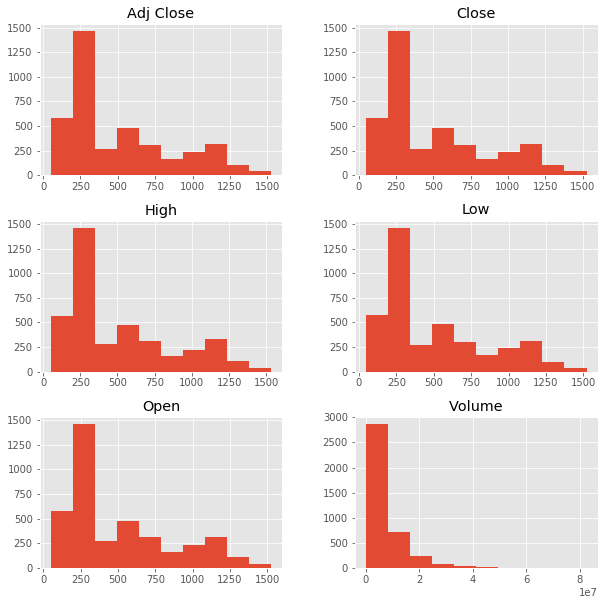

In [0]:
df.hist(figsize = (10,10))

In [0]:
# Percentage change in Open and Close Price 
df['OC_Change'] = (df['Close']-df['Open'])/df['Open']*100

In [0]:
# Percentage change in High and Low Price 
df['HL_Change'] = (df['High']-df['Low'])/df['Low']*100

In [0]:
df = df[['Close','HL_Change','OC_Change','Volume']]

In [0]:
print(df.tail()) 

                  Close  HL_Change  OC_Change   Volume
Date                                                  
2020-04-22  1263.209961   3.511517   1.418655  2093100
2020-04-23  1276.310059   2.183825   0.374347  1566200
2020-04-24  1279.310059   2.477096   1.438348  1640400
2020-04-27  1275.880005   2.139482  -1.552469  1600600
2020-04-28  1233.670044   4.532552  -4.212962  2898600


### Features & Labels

In [0]:
forecast_Col = 'Close'
forecast_out = int(math.ceil(0.01*len(df)))
df['label'] = df[forecast_Col].shift(-forecast_out)
print(df['label'])

Date
2004-08-19    71.785927
2004-08-20    74.301498
2004-08-23    73.693779
2004-08-24    69.982689
2004-08-25    74.411087
                ...    
2020-04-22          NaN
2020-04-23          NaN
2020-04-24          NaN
2020-04-27          NaN
2020-04-28          NaN
Name: label, Length: 3950, dtype: float64


C:\Users\Kenny Stryker\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
df.tail()

,Close,HL_Change,OC_Change,Volume,label
Date,,,,,
2020-04-22,1263.209961,3.511517,1.418655,2093100,NaN
2020-04-23,1276.310059,2.183825,0.374347,1566200,NaN
2020-04-24,1279.310059,2.477096,1.438348,1640400,NaN
2020-04-27,1275.880005,2.139482,-1.552469,1600600,NaN
2020-04-28,1233.670044,4.532552,-4.212962,2898600,NaN


In [0]:
df.dropna(inplace=True)
df.tail()

C:\Users\Kenny Stryker\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Close,HL_Change,OC_Change,Volume,label
Date,,,,,
2020-02-25,1388.449951,4.032117,-3.108866,2478300,1263.209961
2020-02-26,1393.180054,2.661345,-0.212010,2202400,1276.310059
2020-02-27,1318.089966,4.140235,-3.228205,2978300,1279.310059
2020-02-28,1339.329956,5.518491,4.839918,3790600,1275.880005
2020-03-02,1389.109985,4.827731,2.774469,2431500,1233.670044


### Data Splitting

In [0]:
X  =  np.array(df.drop(['label'], axis = 1))
Y  =  np.array(df['label'])

In [0]:
print(len(X),len(Y))

3910 3910


In [0]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size = 0.2)

In [0]:
np.shape(X_train)

(3128, 4)


# Linear Regression

In [0]:
startlr = time.time()

lr = LinearRegression()
lr.fit(X_train,Y_train)

endlr = time.time()

time_lr = endlr-startlr

print('Training Time :- {}'.format(time_lr))

Training Time :- 0.0019714832305908203


In [0]:
accuracy = lr.score(X_test,Y_test)
print(accuracy)

0.980387448675541


In [0]:
X = X[:-forecast_out]
X_old = X[-forecast_out:]

Forecast_set = lr.predict(X_old)
print(Forecast_set)

[1297.59817433 1297.18574039 1311.93232024 1316.14941448 1304.9222716
 1304.11826092 1303.53672485 1315.61931295 1338.19280597 1325.54026036
 1320.73472226 1307.89357172 1306.39796163 1300.61711512 1311.68482891
 1318.72726222 1318.4834937  1311.03674504 1294.8140507  1299.72982087
 1324.32906538 1332.94511564 1345.05222122 1347.4391667  1349.19000864
 1350.31249831 1354.46185229 1352.27877629 1365.25974938 1359.25281532
 1357.1404263  1360.29674086 1352.74531115 1353.86098213 1349.31170733
 1364.54511767 1356.78029235 1341.15434758 1341.88417684 1369.93656754]


C:\Users\Kenny Stryker\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Kenny Stryker\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


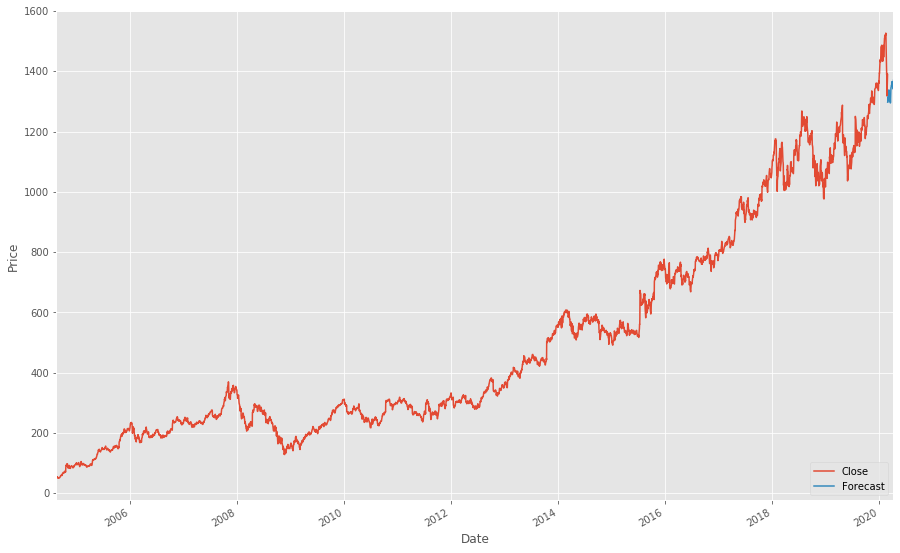

In [0]:
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in Forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]

df['Close'].plot(figsize = (15,10))
df['Forecast'].plot(figsize = (15,10))
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Decision Tree

In [0]:
startdt = time.time()

tree = DecisionTreeRegressor(random_state = 0)
tree.fit(X_train, Y_train)

enddt = time.time()

time_dt = enddt-startdt

print('Training Time :- {}'.format(time_dt))

print('Accuracy:- {}'.format(tree.score(X_test, Y_test)))

Training Time :- 0.011029481887817383
Accuracy:- 0.9759208300604797


In [0]:
X = X[:-forecast_out]
X_old = X[-forecast_out:]

Forecast_set = tree.predict(X_old)
print(Forecast_set)

[1292.030029 1260.109985 1308.859985 1311.369995 1299.189941 1298.800049
 1298.       1311.459961 1334.869995 1320.699951 1315.459961 1303.050049
 1301.349976 1295.339966 1306.689941 1313.550049 1312.98999  1304.959961
 1289.920044 1295.280029 1320.540039 1328.130005 1340.619995 1343.560059
 1344.660034 1289.920044 1350.27002  1347.829956 1361.170044 1355.119995
 1352.619995 1347.829956 1349.589966 1348.839966 1393.339966 1184.650024
 1351.890015 1336.140015 1337.02002  1393.339966]


# K-NN

In [0]:
startknn = time.time()

knn = KNeighborsRegressor(13)
knn.fit(X_train, Y_train)

endknn = time.time()

time_knn = endknn - startknn

print('Training Time:- {}'.format(time_knn))
print('Accuracy:- {}'.format(knn.score(X_test, Y_test)))

Training Time:- 0.0010004043579101562
Accuracy:- 0.7355242107717102


In [0]:
X = X[:-forecast_out]
X_old = X[-forecast_out:]

Forecast_set = knn.predict(X_old)
print(Forecast_set)

[ 969.16003638  937.69229377 1025.49769008  939.72312354  780.15166762
  850.43307262 1147.09152931  853.12845077  804.07025154  379.83131746
  742.60193577  948.83127077  892.40603638  860.96688138  777.20667908
  609.91462823  745.04208615  870.713177   1007.69598392 1035.88000023
 1162.29537731  936.57093231  885.48669438  865.71735092 1014.98827646
  973.18128854  958.01311077  949.29894069 1102.71153377  738.20767677
  898.49674631 1020.34614446 1054.44953323 1084.76147938  907.36500646
  928.17803008 1024.24000431  977.988455   1043.86922977  922.17222715]


# Neural Network Implementation

In [0]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Loading Dataset for LSTM

In [0]:
dfl = pd.read_csv('GOOG.csv',index_col="Date",parse_dates=True)
#Show the data
dfl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
...,...,...,...,...,...,...
2020-04-22,1245.540039,1285.613037,1242.000000,1263.209961,1263.209961,2093100
2020-04-23,1271.550049,1293.310059,1265.670044,1276.310059,1276.310059,1566200
2020-04-24,1261.170044,1280.400024,1249.449951,1279.310059,1279.310059,1640400


### Preprocessing & Feature Extraction

In [0]:
#Get the number of rows and columns in the data set
dfl.shape

(3950, 6)

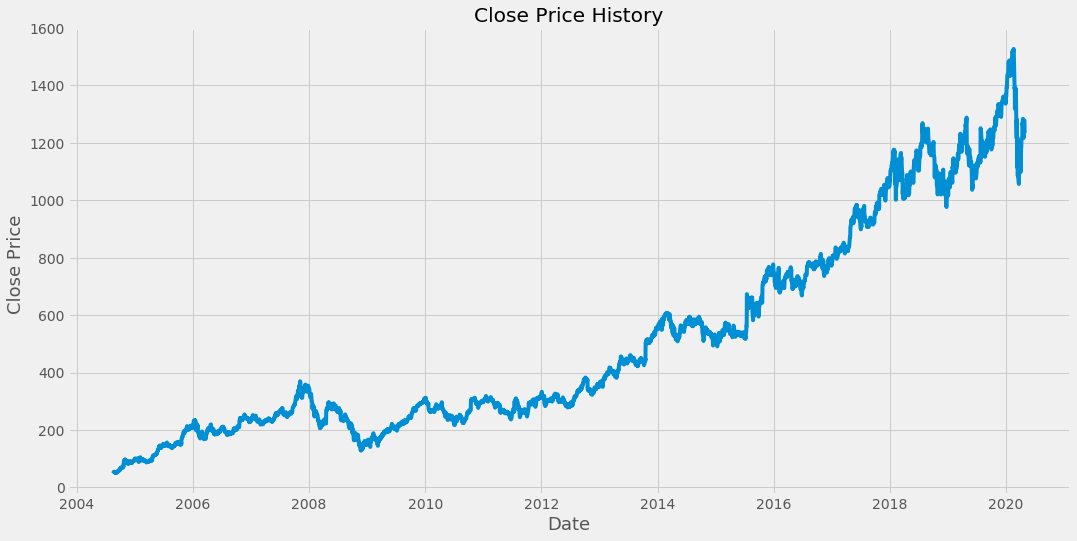

In [0]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(dfl['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.show()

In [0]:

#Create a new dataframe with only the 'Close column
data = dfl.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

3160

In [0]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.11307572e-04],
       [2.79949983e-03],
       [3.16714518e-03],
       ...,
       [8.32497375e-01],
       [8.30174862e-01],
       [8.01594206e-01]])

In [0]:
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_trainl = []
y_trainl = []

for i in range(60, len(train_data)):
    x_trainl.append(train_data[i-60:i, 0])
    y_trainl.append(train_data[i, 0])
    if i<= 61:
        print(x_trainl)
        print(y_trainl)
        print()

[array([1.11307572e-04, 2.79949983e-03, 3.16714518e-03, 1.63922502e-03,
       2.02036376e-03, 2.66458425e-03, 2.07095583e-03, 6.74577906e-04,
       7.96002809e-04, 8.09494841e-05, 5.05934276e-04, 0.00000000e+00,
       5.29544993e-04, 7.72392091e-04, 7.75765438e-04, 1.79437797e-03,
       2.52629803e-03, 3.87208117e-03, 4.04409815e-03, 4.70855872e-03,
       5.89581557e-03, 6.52654809e-03, 6.01386712e-03, 6.19600414e-03,
       7.01898898e-03, 6.68507168e-03, 6.15552940e-03, 9.05621676e-03,
       1.04795767e-02, 9.98038914e-03, 1.09855110e-02, 1.18219858e-02,
       1.29384126e-02, 1.25033138e-02, 1.31003129e-02, 1.27225495e-02,
       1.18894426e-02, 1.26112453e-02, 1.37917548e-02, 1.41627762e-02,
       1.48744535e-02, 1.65777640e-02, 1.61662732e-02, 1.36534686e-02,
       1.66519674e-02, 2.44264845e-02, 2.94757025e-02, 2.75868836e-02,
       2.89933816e-02, 3.14657108e-02, 3.05685205e-02, 3.23865099e-02,
       3.19952538e-02, 3.09159285e-02, 2.85650235e-02, 2.33876346e-02,
     

In [0]:
#Convert the x_train and y_train to numpy arrays 
x_trainl, y_trainl = np.array(x_trainl), np.array(y_trainl)

In [0]:
#Reshape the data
x_trainl = np.reshape(x_trainl, (x_trainl.shape[0], x_trainl.shape[1], 1))
x_trainl.shape

(3100, 60, 1)

## Build the LSTM model

In [0]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape= (x_trainl.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [0]:
#Train the model
lstm_start = time.time()

history = model.fit(x_trainl, y_trainl, epochs=100, batch_size=32)
lstm_end = time.time()

total_lstm = lstm_end - lstm_start

Train on 3100 samples
Epoch 1/100
3100/3100 [==============================] - 4s 1ms/sample - loss: 0.0035
Epoch 2/100
3100/3100 [==============================] - 1s 168us/sample - loss: 1.0870e-04
Epoch 3/100
3100/3100 [==============================] - 1s 168us/sample - loss: 9.8952e-05
Epoch 4/100
3100/3100 [==============================] - 1s 165us/sample - loss: 9.3998e-05s - loss: 8.
Epoch 5/100
3100/3100 [==============================] - 1s 166us/sample - loss: 8.7145e-05
Epoch 6/100
3100/3100 [==============================] - 1s 165us/sample - loss: 9.0018e-05
Epoch 7/100
3100/3100 [==============================] - 1s 165us/sample - loss: 8.6095e-05
Epoch 8/100
3100/3100 [==============================] - 1s 168us/sample - loss: 8.7382e-05s - loss: 8
Epoch 9/100
3100/3100 [==============================] - 1s 180us/sample - loss: 8.0657e-05
Epoch 10/100
3100/3100 [==============================] - 1s 176us/sample - loss: 7.3519e-05
Epoch 11/100
3100/3100 [================

3100/3100 [==============================] - 1s 176us/sample - loss: 2.3023e-05
Epoch 89/100
3100/3100 [==============================] - 1s 171us/sample - loss: 2.3031e-05
Epoch 90/100
3100/3100 [==============================] - 1s 170us/sample - loss: 2.7176e-05
Epoch 91/100
3100/3100 [==============================] - 1s 171us/sample - loss: 2.2664e-05
Epoch 92/100
3100/3100 [==============================] - 1s 172us/sample - loss: 2.4606e-05
Epoch 93/100
3100/3100 [==============================] - 1s 172us/sample - loss: 3.0170e-05
Epoch 94/100
3100/3100 [==============================] - 1s 171us/sample - loss: 2.5065e-05
Epoch 95/100
3100/3100 [==============================] - 1s 171us/sample - loss: 2.1702e-05
Epoch 96/100
3100/3100 [==============================] - 1s 171us/sample - loss: 2.4418e-05
Epoch 97/100
3100/3100 [==============================] - 1s 173us/sample - loss: 2.4069e-05
Epoch 98/100
3100/3100 [==============================] - 1s 173us/sample - loss: 2

In [0]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_testl = []
y_testl = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_testl.append(test_data[i-60:i, 0])

In [0]:
#Convert the data to a numpy array
x_testl = np.array(x_testl)

In [0]:
#Reshape the data
x_testl = np.reshape(x_testl, (x_testl.shape[0], x_testl.shape[1], 1 ))

In [0]:
#Get the models predicted price values 
predictionsl = model.predict(x_testl)
predictionsl = scaler.inverse_transform(predictionsl)

In [0]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictionsl - y_testl)**2)))
rmse

28.8723919394513

### Visualizing Results of LSTM Model

C:\Users\Kenny Stryker\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


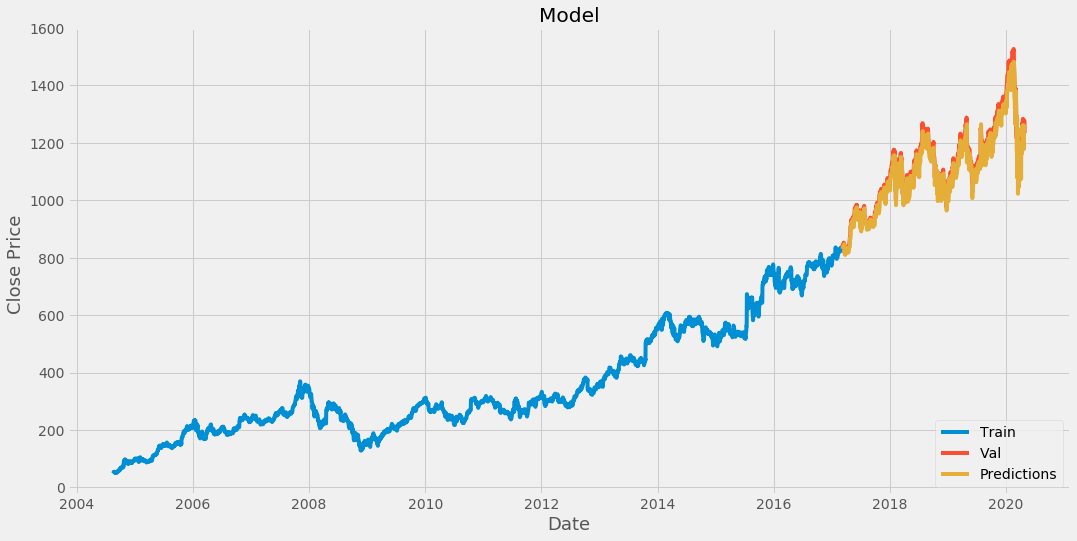

In [0]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictionsl
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [0]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2017-03-09,838.679993,830.387390
2017-03-10,843.250000,833.466492
2017-03-13,845.539978,838.077759
2017-03-14,845.619995,839.762817
2017-03-15,847.200012,839.380554
...,...,...
2020-04-22,1263.209961,1177.323608
2020-04-23,1276.310059,1259.421021
2020-04-24,1279.310059,1250.409912


In [0]:
lstm_temp_pred = valid[['Predictions']].tail(40)
lstm_temp_ori = valid[['Close']].tail(40)

In [0]:
lstm_temp_pred.reset_index(drop=True, inplace=True)
lstm_temp_ori.reset_index(drop=True, inplace=True)

In [0]:
lstm_temp_pred = lstm_temp_pred.values.tolist()
lstm_temp_ori = lstm_temp_ori.values.tolist()

In [0]:
lstm = []
original = []
for i in range(40):
    lstm.append(lstm_temp_pred[i][-1])
    original.append(lstm_temp_ori[i][-1])

### Visualizing Result of Supervised Learning algorithms

In [0]:
days = [int(i) for i in range(39)]

predictions = {'Original':original,
               'Linear Regression':lr.predict(X_old),
              'KNN':knn.predict(X_old),
              'Decision Tree':tree.predict(X_old),
              'LSTM':lstm}

predictions = pd.DataFrame(predictions)

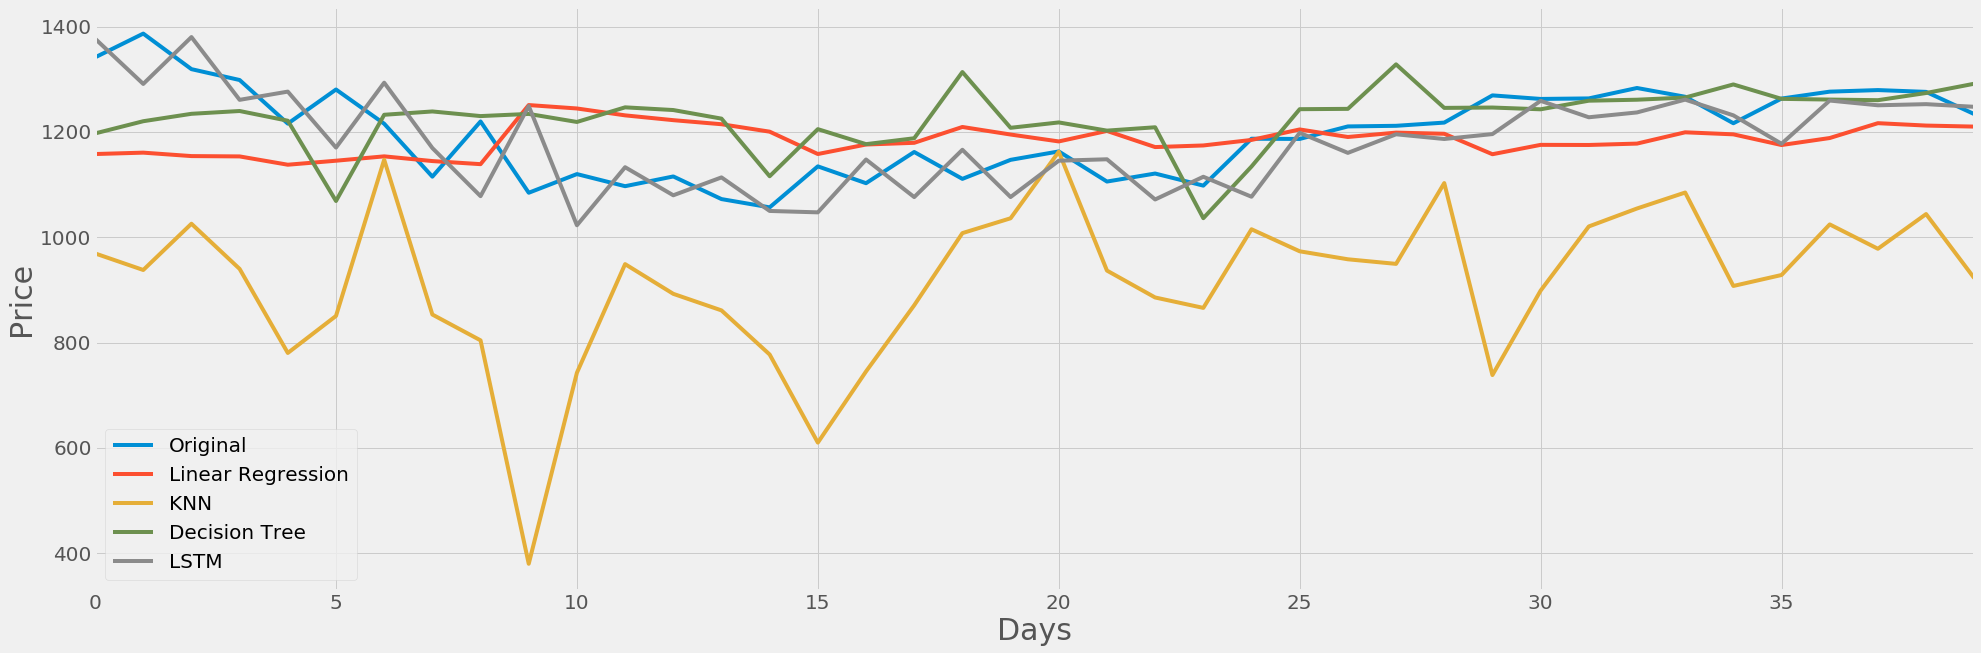

In [0]:
predictions['Original'].plot(figsize = (30,10), fontsize = 20)
predictions['Linear Regression'].plot(figsize = (30,10), fontsize = 20)
predictions['KNN'].plot(figsize = (30,10), fontsize = 20)
predictions['Decision Tree'].plot(figsize = (30,10), fontsize = 20)
predictions['LSTM'].plot(figsize = (30,10), fontsize = 20)
plt.legend(['Original','Linear Regression', 'KNN', 'Decision Tree', 'LSTM'], fontsize=20)
plt.xlabel('Days', fontsize = 30)
plt.ylabel('Price', fontsize = 30)
plt.show()

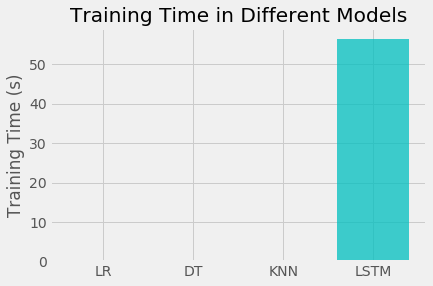

In [0]:
objects = ('LR', 'DT', 'KNN', 'LSTM')
y_pos = np.arange(len(objects))
performance = [time_lr, time_dt, time_knn, total_lstm]

plt.bar(y_pos, performance, align='center', color='c', alpha = 0.75)
plt.xticks(y_pos, objects)
plt.ylabel('Training Time (s)')
plt.title('Training Time in Different Models')

plt.show()